In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import time
import os

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
pd.options.display.max_columns = None
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


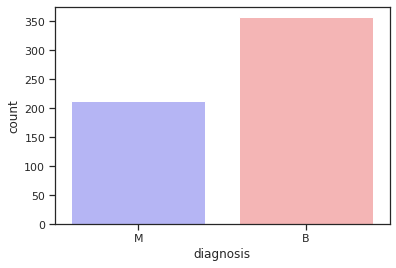

In [4]:
sns.set(style="ticks")
f = sns.countplot(x="diagnosis", data=df, palette="bwr")
plt.show()

In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
X = df.drop(['diagnosis'], axis = 1)
X=df.drop(['Unnamed: 32'], axis=1)
Y = df['diagnosis']

In [11]:
X = pd.get_dummies(X, prefix_sep='_')
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


In [12]:
Y = LabelEncoder().fit_transform(Y)
#np.set_printoptions(threshold=np.inf)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X = StandardScaler().fit_transform(X)

PCA

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['diagnosis']], axis = 1)
PCA_df['diagnosis'] = LabelEncoder().fit_transform(PCA_df['diagnosis'])
PCA_df.head()

,PC1,PC2,diagnosis
0,9.246443,2.296744,1
1,2.911790,-3.783762,1
2,6.052625,-0.941725,1
3,7.160006,10.351667,1
4,4.328704,-1.873560,1


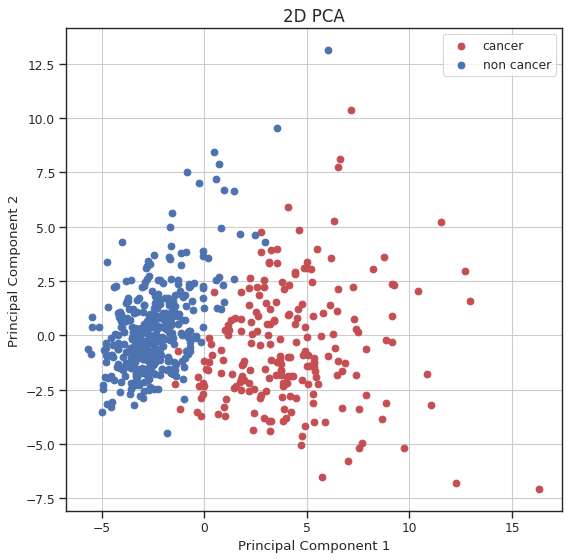

In [15]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

diagnosis = [1, 0]
colors = ['r', 'b']
for clas, color in zip(diagnosis, colors):
    plt.scatter(PCA_df.loc[PCA_df['diagnosis'] == clas, 'PC1'], PCA_df.loc[PCA_df['diagnosis'] == clas, 'PC2'], c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['cancer', 'non cancer'])
plt.grid()

In [16]:
pca.explained_variance_ratio_

array([0.44231633, 0.17469056])

RANDOM FOREST

In [17]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [18]:
def complete_test_2D(X, Y, plot_name = ''):
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    Small_df = pd.concat([Small_df, df['diagnosis']], axis = 1)
    Small_df['diagnosis'] = LabelEncoder().fit_transform(Small_df['diagnosis'])
    forest_test(X, Y)
    

In [19]:
complete_test_2D(X_pca, Y, 'PCA')

1.0232496560000008
[[102   3]
 [  1  65]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       105
           1       0.96      0.98      0.97        66

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



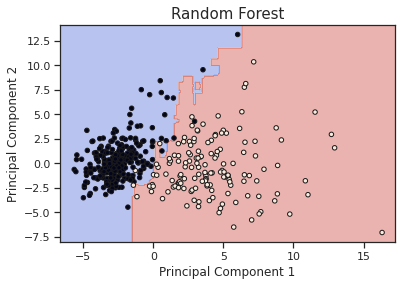

In [20]:
from itertools import product

X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Reduced,Y_Reduced)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = trainedforest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('Random Forest', fontsize = 15)
plt.show()

SVM RBF

In [21]:
from sklearn.svm import SVC

def svm_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
    start = time.process_time()
    svc_rbf = SVC(kernel = 'rbf').fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionsvcrbf = svc_rbf.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionsvcrbf))
    print(classification_report(Y_Test,predictionsvcrbf))

In [22]:
def complete_test_2D_svm(X, Y, plot_name = ''):
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    Small_df = pd.concat([Small_df, df['diagnosis']], axis = 1)
    Small_df['diagnosis'] = LabelEncoder().fit_transform(Small_df['diagnosis'])
    svm_test(X, Y)
    data = []
    

In [23]:
complete_test_2D_svm(X_pca, Y, 'PCA')

0.0020287859999985614
[[101   4]
 [  1  65]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       105
           1       0.94      0.98      0.96        66

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



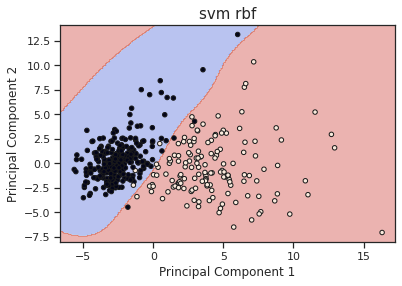

In [24]:
from itertools import product

X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)
svc_rbf = SVC(kernel = 'rbf').fit(X_Reduced,Y_Reduced)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('svm rbf', fontsize = 15)
plt.show()

SVM linear

In [25]:
from sklearn.svm import SVC

def svm_lin_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
    start = time.process_time()
    svm_lin = SVC(kernel = 'linear').fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionsvmlin = svm_lin.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionsvmlin))
    print(classification_report(Y_Test,predictionsvmlin))


In [26]:
def complete_test_2D_svm_lin(X, Y, plot_name = ''):
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    Small_df = pd.concat([Small_df, df['diagnosis']], axis = 1)
    Small_df['diagnosis'] = LabelEncoder().fit_transform(Small_df['diagnosis'])
    svm_lin_test(X, Y)

In [27]:
complete_test_2D_svm_lin(X_pca, Y, 'PCA')

0.002286156000000261
[[104   1]
 [  1  65]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.98      0.98      0.98        66

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



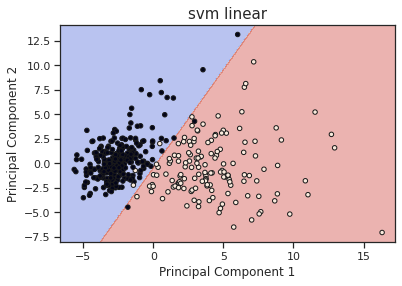

In [28]:
from itertools import product

X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)
svc_lin = SVC(kernel = 'linear').fit(X_Reduced,Y_Reduced)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svc_lin.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('svm linear', fontsize = 15)
plt.show()

KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
def knn_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
    start = time.process_time()
    knn = KNeighborsClassifier(n_neighbors=10).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionknn = knn.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionknn))
    print(classification_report(Y_Test,predictionknn))

In [31]:
def complete_test_2D_knn(X, Y, plot_name = ''):
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    Small_df = pd.concat([Small_df, df['diagnosis']], axis = 1)
    Small_df['diagnosis'] = LabelEncoder().fit_transform(Small_df['diagnosis'])
    knn_test(X, Y)

In [32]:
complete_test_2D_knn(X_pca, Y, 'PCA')

0.0012079310000014942
[[101   4]
 [  1  65]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       105
           1       0.94      0.98      0.96        66

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



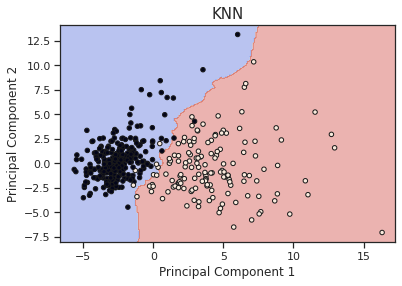

In [33]:
from itertools import product

X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)
knn = KNeighborsClassifier(n_neighbors=10).fit(X_Reduced,Y_Reduced)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('KNN', fontsize = 15)
plt.show()

LOGISTIC REGRESSION

In [34]:
from sklearn.linear_model import LogisticRegression


def log_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
    start = time.process_time()
    log = LogisticRegression(random_state = 0).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionlog = log.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionlog))
    print(classification_report(Y_Test,predictionlog))

In [35]:
def complete_test_2D_log(X, Y, plot_name = ''):
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    Small_df = pd.concat([Small_df, df['diagnosis']], axis = 1)
    Small_df['diagnosis'] = LabelEncoder().fit_transform(Small_df['diagnosis'])
    log_test(X, Y)

In [36]:
complete_test_2D_log(X_pca, Y, 'PCA')

0.0048384360000000015
[[103   2]
 [  1  65]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.97      0.98      0.98        66

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



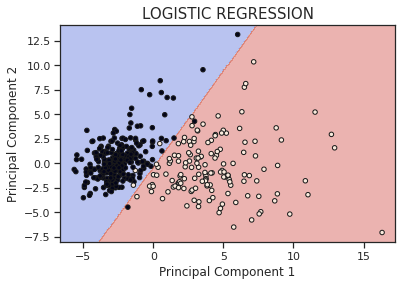

In [37]:
from itertools import product

X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)
log = LogisticRegression(random_state = 0).fit(X_Reduced,Y_Reduced)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = log.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('LOGISTIC REGRESSION', fontsize = 15)
plt.show()

DECISION TREE

In [38]:
from sklearn.tree import DecisionTreeClassifier


def tree_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
    start = time.process_time()
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictiontree = tree.predict(X_Test)
    print(confusion_matrix(Y_Test,predictiontree))
    print(classification_report(Y_Test,predictiontree))

In [39]:
def complete_test_2D_tree(X, Y, plot_name = ''):
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    Small_df = pd.concat([Small_df, df['diagnosis']], axis = 1)
    Small_df['diagnosis'] = LabelEncoder().fit_transform(Small_df['diagnosis'])
    tree_test(X, Y)

In [40]:
complete_test_2D_tree(X_pca, Y, 'PCA')

0.001218471999999693
[[98  7]
 [ 2 64]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       105
           1       0.90      0.97      0.93        66

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



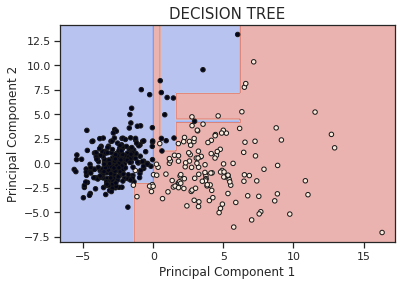

In [41]:
X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_Reduced,Y_Reduced)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('DECISION TREE', fontsize = 15)
plt.show()

Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB


def nb_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
    start = time.process_time()
    nb = GaussianNB().fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionnb = nb.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionnb))
    print(classification_report(Y_Test,predictionnb))

In [43]:
def complete_test_2D_nb(X, Y, plot_name = ''):
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    Small_df = pd.concat([Small_df, df['diagnosis']], axis = 1)
    Small_df['diagnosis'] = LabelEncoder().fit_transform(Small_df['diagnosis'])
    nb_test(X, Y)

In [44]:
complete_test_2D_nb(X_pca, Y, 'PCA')

0.0011412219999993312
[[100   5]
 [  8  58]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.92      0.88      0.90        66

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



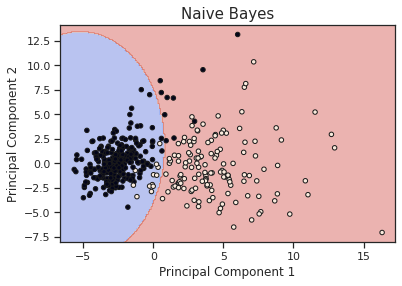

In [45]:
X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)
nb = GaussianNB().fit(X_Reduced,Y_Reduced)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('Naive Bayes', fontsize = 15)
plt.show()